## Dependencies

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression 
import xgboost as xgb

from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectKBest, f_regression


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## EDA

In [2]:
df = pd.read_csv('umico.csv')

In [3]:
df.head()

,url,title,seller,discount_percentage,discounted_price,real_price,monthly_payment_amount,loan_duration
0,www.umico.az/product/342843-dr-smart-sakitlesh...,Sakitləşdirici gel Dr.Smart lavanda ilə 300 ml,DR SMART,50,8.00,16.00,NaN,NaN
1,www.umico.az/product/408705-chilchiraq-davon-6...,Çılçıraq Davon 6 plafon,Decoria,30,538.93,769.90,NaN,NaN
2,www.umico.az/product/45702-paket-uchun-sixacla...,"Paket üçün sıxaclar Qlux L-509, 7x5.3sm, 2əd",Bravo,55,0.89,1.99,NaN,NaN
3,www.umico.az/product/278512-qadin-bosonojkalar...,Qadınlar üçün topuklu səndəllər Polaris 2M 315...,FLO,49,27.99,54.99,NaN,NaN
4,www.umico.az/product/326589-sichan-hoco-gm15-b...,Siçan Hoco GM15 Black,"Metashop, Bir electronics, Bir Express, Ce...",23,13.46,17.50,NaN,NaN


In [4]:
df.tail()

,url,title,seller,discount_percentage,discounted_price,real_price,monthly_payment_amount,loan_duration
56616,www.umico.az/product/515552-qolbaq-4md546-gumushu,Qolbaq 4MD546 Gümüşü,4moodshop,19,14.58,17.9,NaN,NaN
56617,www.umico.az/product/515575-qolbaq-4md569-gumushu,Qolbaq 4MD569 Gümüşü,4moodshop,19,14.58,17.9,NaN,NaN
56618,www.umico.az/product/477358-qol-saati-swiss-mi...,Qol saatı Swiss Military SM34066.04,Saat Store,10,566.10,629.0,31.46,18.0
56619,www.umico.az/product/208573-qoruyucu-shushe-3d...,Qoruyucu şüşə 3D Super Glass Samsung Galaxy A5...,Royal Aksessuar,20,4.00,5.0,NaN,NaN
56620,www.umico.az/product/208578-qoruyucu-shushe-3d...,Qoruyucu şüşə 3D Super Glass Apple iPhone 8 Pl...,Royal Aksessuar,20,4.00,5.0,NaN,NaN


In [5]:
df.isna().sum()

url                           0
title                         1
seller                        3
discount_percentage           0
discounted_price              0
real_price                    0
monthly_payment_amount    33194
loan_duration             33194
dtype: int64

In [6]:
df.duplicated().sum()

714

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56621 entries, 0 to 56620
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   url                     56621 non-null  object 
 1   title                   56620 non-null  object 
 2   seller                  56618 non-null  object 
 3   discount_percentage     56621 non-null  int64  
 4   discounted_price        56621 non-null  float64
 5   real_price              56621 non-null  float64
 6   monthly_payment_amount  23427 non-null  float64
 7   loan_duration           23427 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 3.5+ MB


In [8]:
df.describe()

,discount_percentage,discounted_price,real_price,monthly_payment_amount,loan_duration
count,56621.000000,56621.000000,56621.000000,23427.000000,23427.000000
mean,26.326116,173.142217,227.001533,16.419318,17.930849
std,14.828191,508.260984,625.178365,33.108049,1.045576
min,0.000000,0.300000,0.510000,1.280000,3.000000
25%,15.000000,16.900000,23.300000,2.840000,18.000000
50%,24.000000,39.900000,59.900000,5.490000,18.000000
75%,35.000000,110.950000,155.000000,15.000000,18.000000
max,90.000000,33800.000000,41715.000000,1877.780000,24.000000


In [9]:
df['seller'].nunique()

5202

In [10]:
df['seller'].value_counts().head(10)

seller
Umico Market             3287
Sabiroğlu                1345
IDMAN MALLARI UCUZLUQ    1264
Decoria                  1081
Parashut.Az              1024
GOODS                    1020
Metashop, Teleshop        805
JYSK                      781
FLO                       734
Gipfel                    724
Name: count, dtype: int64

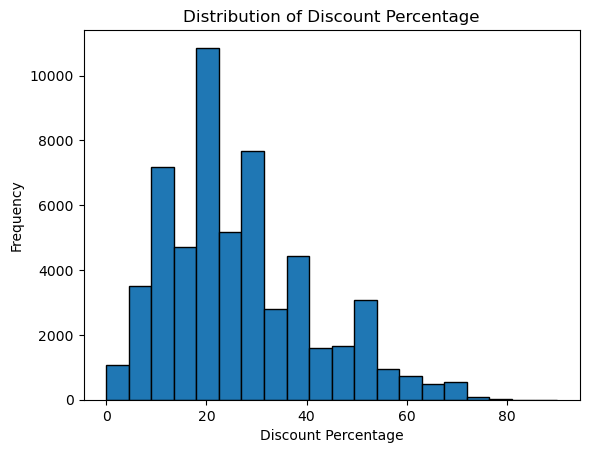

In [11]:
plt.hist(df['discount_percentage'], bins=20, edgecolor='k')
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Discount Percentage')
plt.show()

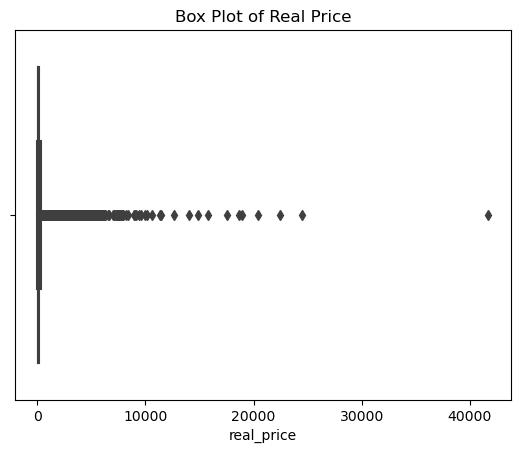

In [12]:
sns.boxplot(x='real_price', data=df)
plt.title('Box Plot of Real Price')
plt.show()

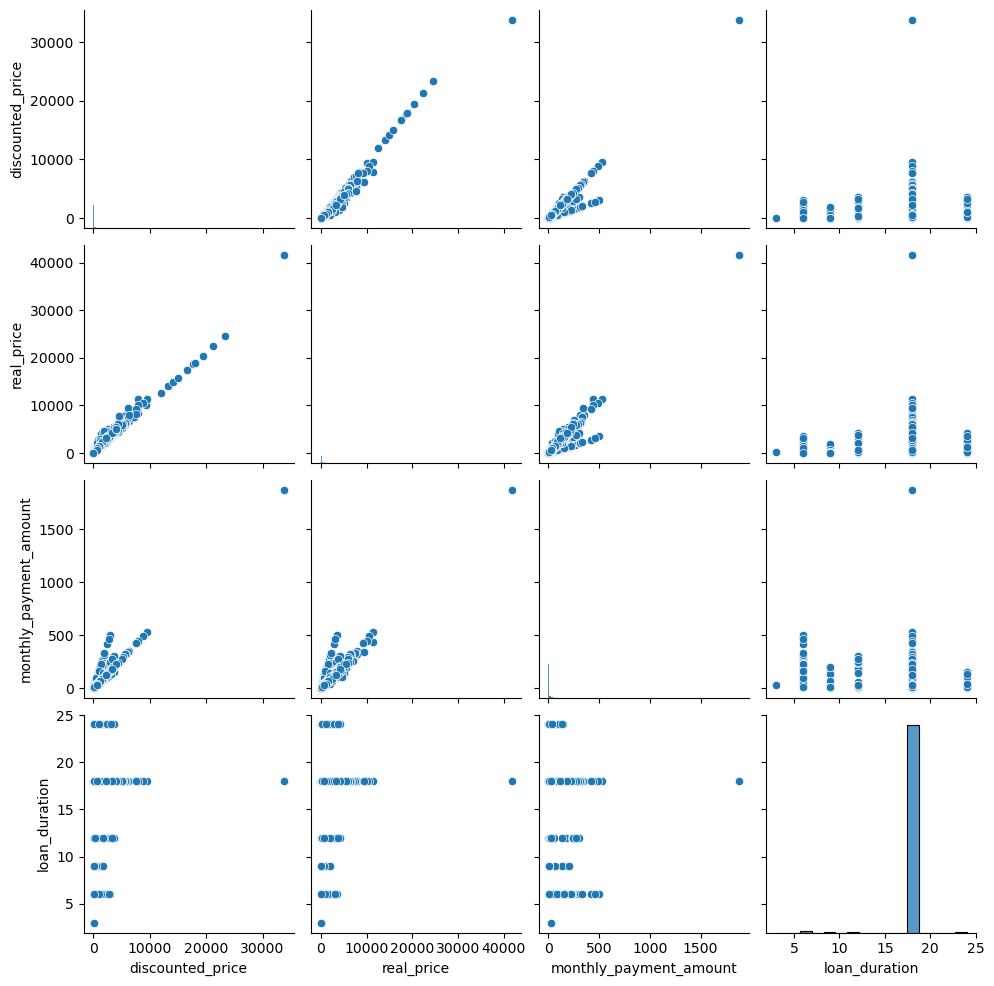

In [13]:
sns.pairplot(df[['discounted_price', 'real_price', 'monthly_payment_amount', 'loan_duration']])
plt.show()

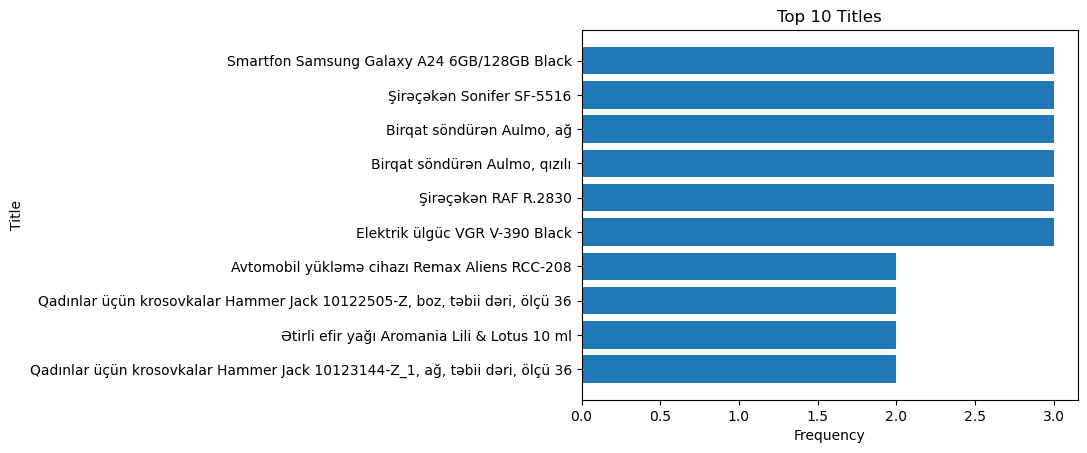

In [14]:
top_10_titles = df['title'].value_counts()[:10]
plt.barh(top_10_titles.index, top_10_titles.values)
plt.xlabel('Frequency')
plt.ylabel('Title')
plt.title('Top 10 Titles')
plt.gca().invert_yaxis()
plt.show()

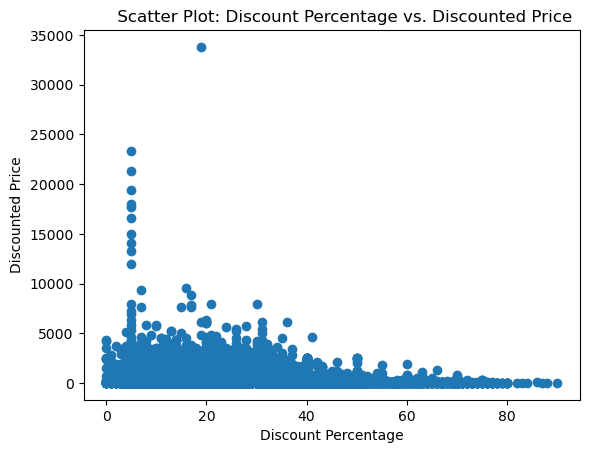

In [15]:
plt.scatter(df['discount_percentage'], df['discounted_price'])
plt.xlabel('Discount Percentage')
plt.ylabel('Discounted Price')
plt.title('     Scatter Plot: Discount Percentage vs. Discounted Price')
plt.show()

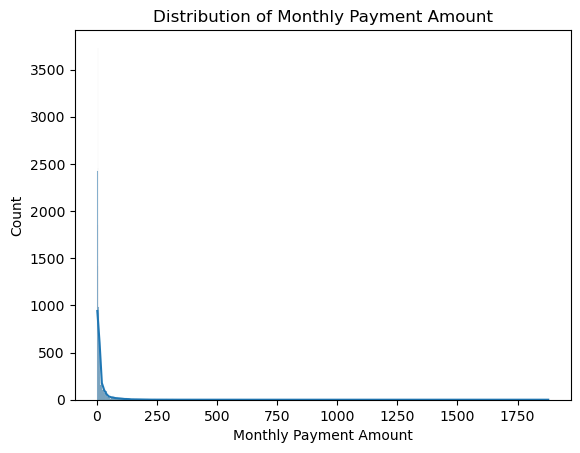

In [16]:
sns.histplot(df['monthly_payment_amount'], kde=True)
plt.xlabel('Monthly Payment Amount')
plt.title('Distribution of Monthly Payment Amount')
plt.show()

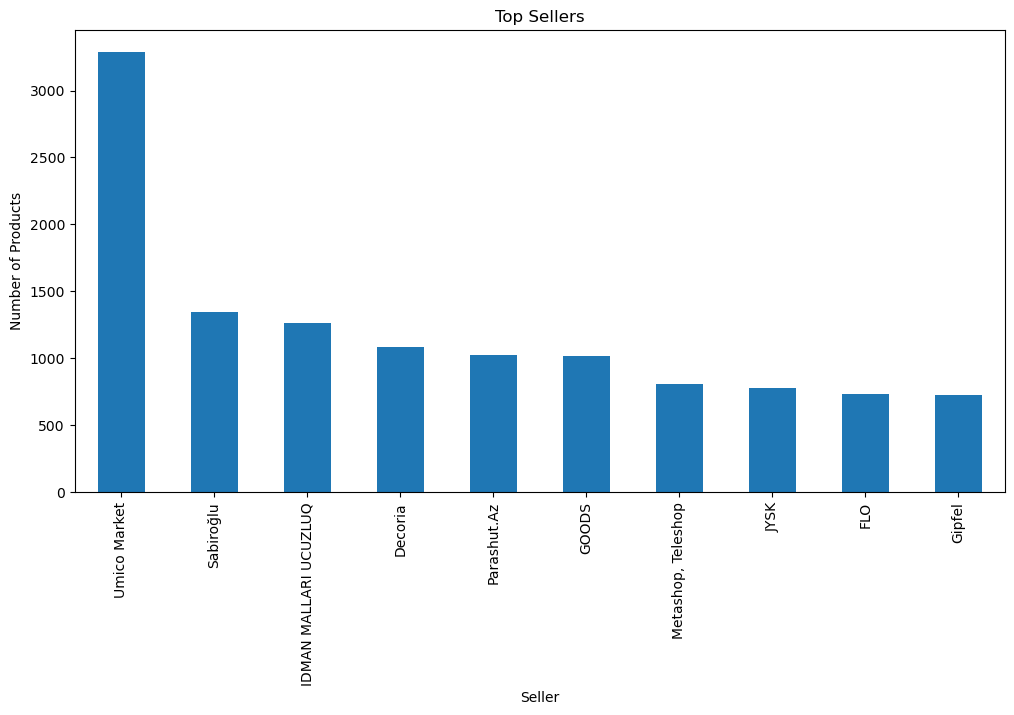

In [44]:
top_sellers = df['seller'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_sellers.plot(kind='bar')
plt.title('Top Sellers')
plt.xlabel('Seller')
plt.ylabel('Number of Products')
plt.show()

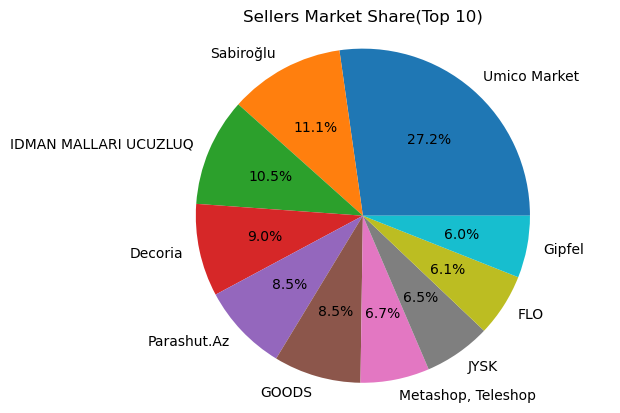

In [17]:
seller_market_share = df['seller'].value_counts().head(10)
plt.pie(seller_market_share, labels=seller_market_share.index, autopct='%1.1f%%')
plt.title('Sellers Market Share(Top 10)')
plt.axis('equal')
plt.show()

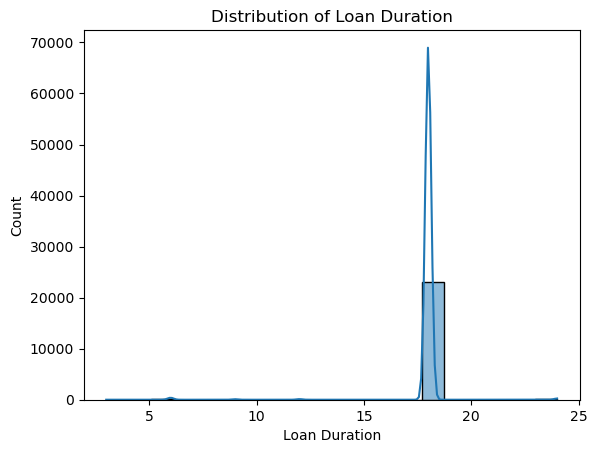

In [18]:
sns.histplot(df['loan_duration'], bins=20, kde=True)
plt.xlabel('Loan Duration')
plt.title('Distribution of Loan Duration')
plt.show()

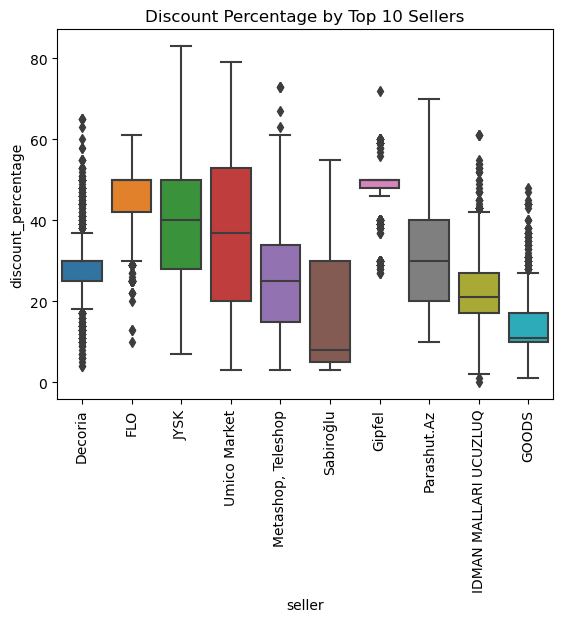

In [19]:
top_10_sellers = df['seller'].value_counts().head(10).index
filtered_df = df[df['seller'].isin(top_10_sellers)]
sns.boxplot(x='seller', y='discount_percentage', data=filtered_df)
plt.xticks(rotation=90)
plt.title('Discount Percentage by Top 10 Sellers')
plt.show()

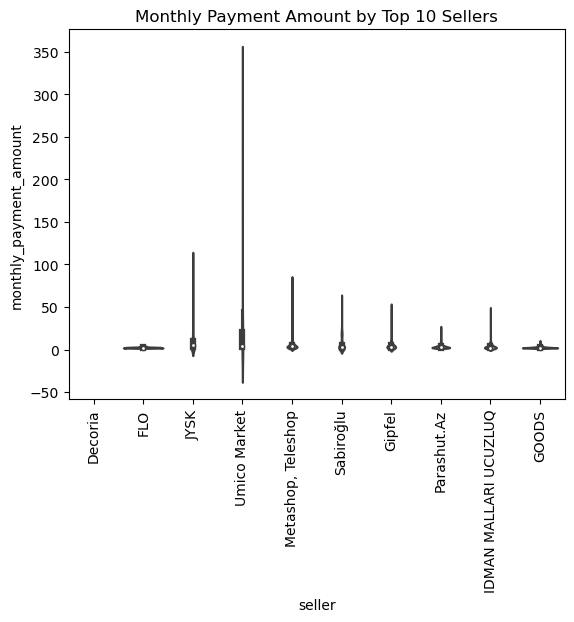

In [20]:
top_10_sellers = df['seller'].value_counts().head(10).index
filtered_df = df[df['seller'].isin(top_10_sellers)]
sns.violinplot(x='seller', y='monthly_payment_amount', data=filtered_df)
plt.xticks(rotation=90)
plt.title('Monthly Payment Amount by Top 10 Sellers')
plt.show()

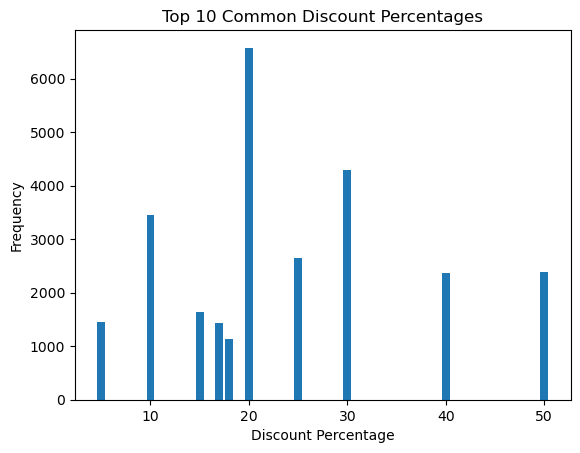

In [21]:
common_discounts = df['discount_percentage'].value_counts().head(10)
plt.bar(common_discounts.index, common_discounts.values)
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')
plt.title('Top 10 Common Discount Percentages')
plt.show()

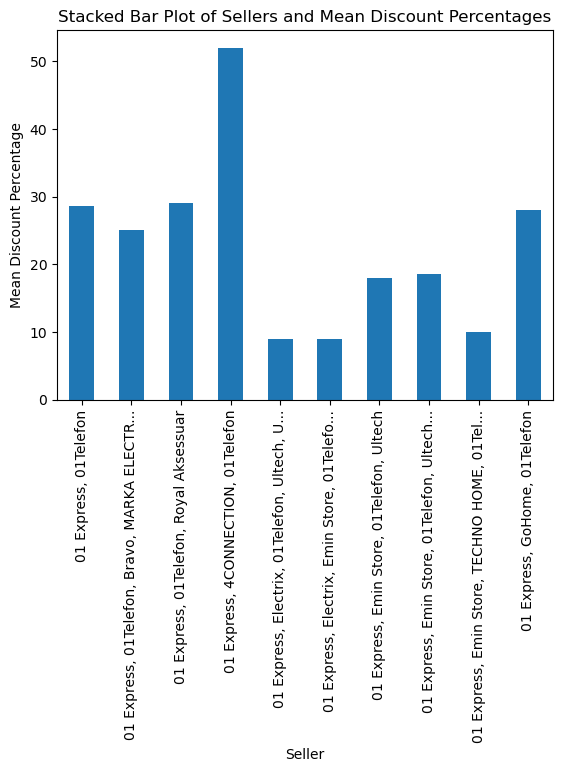

In [22]:
seller_discounts = df.groupby('seller')['discount_percentage'].mean().head(10)
seller_discounts.plot(kind='bar', stacked=True)
plt.xlabel('Seller')
plt.ylabel('Mean Discount Percentage')
plt.title('Stacked Bar Plot of Sellers and Mean Discount Percentages')
plt.xticks(rotation=90)
plt.show()

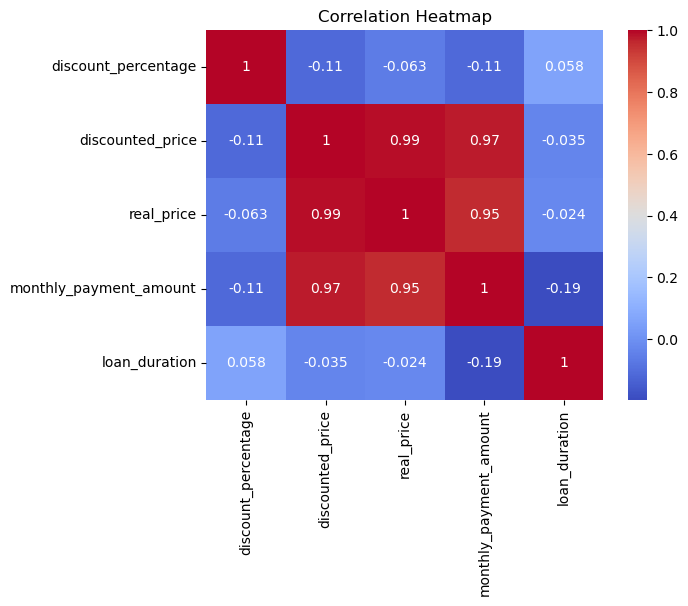

In [23]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Modelling

In [24]:
data = df.drop(['url', 'title', 'seller'], axis=1)
data = data.drop_duplicates()
data = data.dropna()

## Linear Regression

In [25]:
features = ['discounted_price', 'real_price', 'monthly_payment_amount', 'loan_duration']
target = ['discount_percentage']

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
print("Model performance metrics")
print("-----------------------")
print(f"R-squared: {r2:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print("-----------------------")

Model performance metrics
-----------------------
R-squared: 0.26
Root Mean Squared Error: 11.49
Mean Absolute Error: 8.77
-----------------------


## XGBOOST

In [26]:
features = ['discounted_price', 'real_price', 'monthly_payment_amount', 'loan_duration']
target = ['discount_percentage']

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print("Model performance metrics")
print("-----------------------")
print(f"R-squared: {r2:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print("-----------------------")


Model performance metrics
-----------------------
R-squared: 0.99
Root Mean Squared Error: 1.18
Mean Absolute Error: 0.85
-----------------------


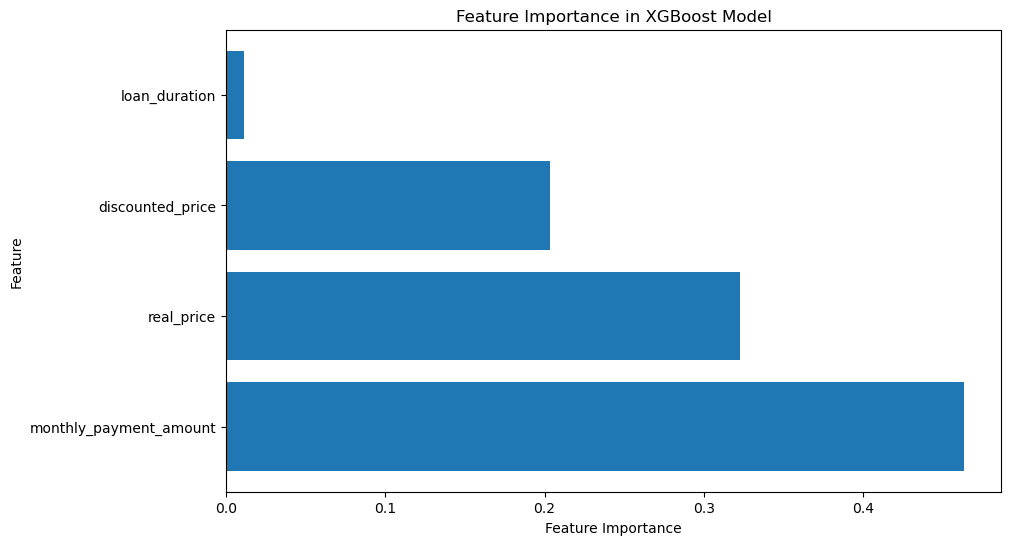

In [27]:
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
sorted_feature_importance = feature_importance_df.sort_values(by='Importance', ascending=False)
top_10_feature_importance = sorted_feature_importance
plt.figure(figsize=(10, 6))
plt.barh(top_10_feature_importance['Feature'], top_10_feature_importance['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in XGBoost Model')
plt.show()

In [28]:
df

,url,title,seller,discount_percentage,discounted_price,real_price,monthly_payment_amount,loan_duration
0,www.umico.az/product/342843-dr-smart-sakitlesh...,Sakitləşdirici gel Dr.Smart lavanda ilə 300 ml,DR SMART,50,8.00,16.00,NaN,NaN
1,www.umico.az/product/408705-chilchiraq-davon-6...,Çılçıraq Davon 6 plafon,Decoria,30,538.93,769.90,NaN,NaN
2,www.umico.az/product/45702-paket-uchun-sixacla...,"Paket üçün sıxaclar Qlux L-509, 7x5.3sm, 2əd",Bravo,55,0.89,1.99,NaN,NaN
3,www.umico.az/product/278512-qadin-bosonojkalar...,Qadınlar üçün topuklu səndəllər Polaris 2M 315...,FLO,49,27.99,54.99,NaN,NaN
4,www.umico.az/product/326589-sichan-hoco-gm15-b...,Siçan Hoco GM15 Black,"Metashop, Bir electronics, Bir Express, Ce...",23,13.46,17.50,NaN,NaN
...,...,...,...,...,...,...,...,...
56616,www.umico.az/product/515552-qolbaq-4md546-gumushu,Qolbaq 4MD546 Gümüşü,4moodshop,19,14.58,17.90,NaN,NaN
56617,www.umico.az/product/515575-qolbaq-4md569-gumushu,Qolbaq 4MD569 Gümüşü,4moodshop,19,14.58,17.90,NaN,NaN
56618,www.umico.az/product/477358-qol-saati-swiss-mi...,Qol saatı Swiss Military SM34066.04,Saat Store,10,566.10,629.00,31.46,18.0
56619,www.umico.az/product/208573-qoruyucu-shushe-3d...,Qoruyucu şüşə 3D Super Glass Samsung Galaxy A5...,Royal Aksessuar,20,4.00,5.00,NaN,NaN
